## Importing Libraries

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)


from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


## Data Loading

In [161]:
df_0 = pd.read_csv("dataset/KDDTrain+.txt",header=None)
df= df_0.copy()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.170,0.030,0.170,0.000,0.000,0.000,0.050,0.000,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21


## Data Cleaning
We don't have the names of the features from the given dataset so we adjust the columns from : https://www.kaggle.com/code/timgoodfellow/nsl-kdd-explorations

In [162]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'label'
,'level'])

df.columns = columns

In [163]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  str    
 2   service                      125973 non-null  str    
 3   flag                         125973 non-null  str    
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13  root_shell

In [164]:
df.shape

(125973, 43)

In [165]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.000,287.145,2604.515,0.000,0.000,0.000,0.000,42908.000
src_bytes,125973.000,45566.743,5870331.182,0.000,0.000,44.000,276.000,1379963888.000
dst_bytes,125973.000,19779.114,4021269.151,0.000,0.000,0.000,516.000,1309937401.000
land,125973.000,0.000,0.014,0.000,0.000,0.000,0.000,1.000
wrong_fragment,125973.000,0.023,0.254,0.000,0.000,0.000,0.000,3.000
urgent,125973.000,0.000,0.014,0.000,0.000,0.000,0.000,3.000
hot,125973.000,0.204,2.150,0.000,0.000,0.000,0.000,77.000
num_failed_logins,125973.000,0.001,0.045,0.000,0.000,0.000,0.000,5.000
logged_in,125973.000,0.396,0.489,0.000,0.000,0.000,1.000,1.000
num_compromised,125973.000,0.279,23.942,0.000,0.000,0.000,0.000,7479.000


There are some outlier values, but we will check if it's too much

## Data Pre-processing

In [166]:
# Null values
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Dataset does not contain any null values

In [167]:
# Duplicates
df.duplicated().sum()

np.int64(0)

Dataset does not contain any duplicate values

<Figure size 2000x4000 with 0 Axes>

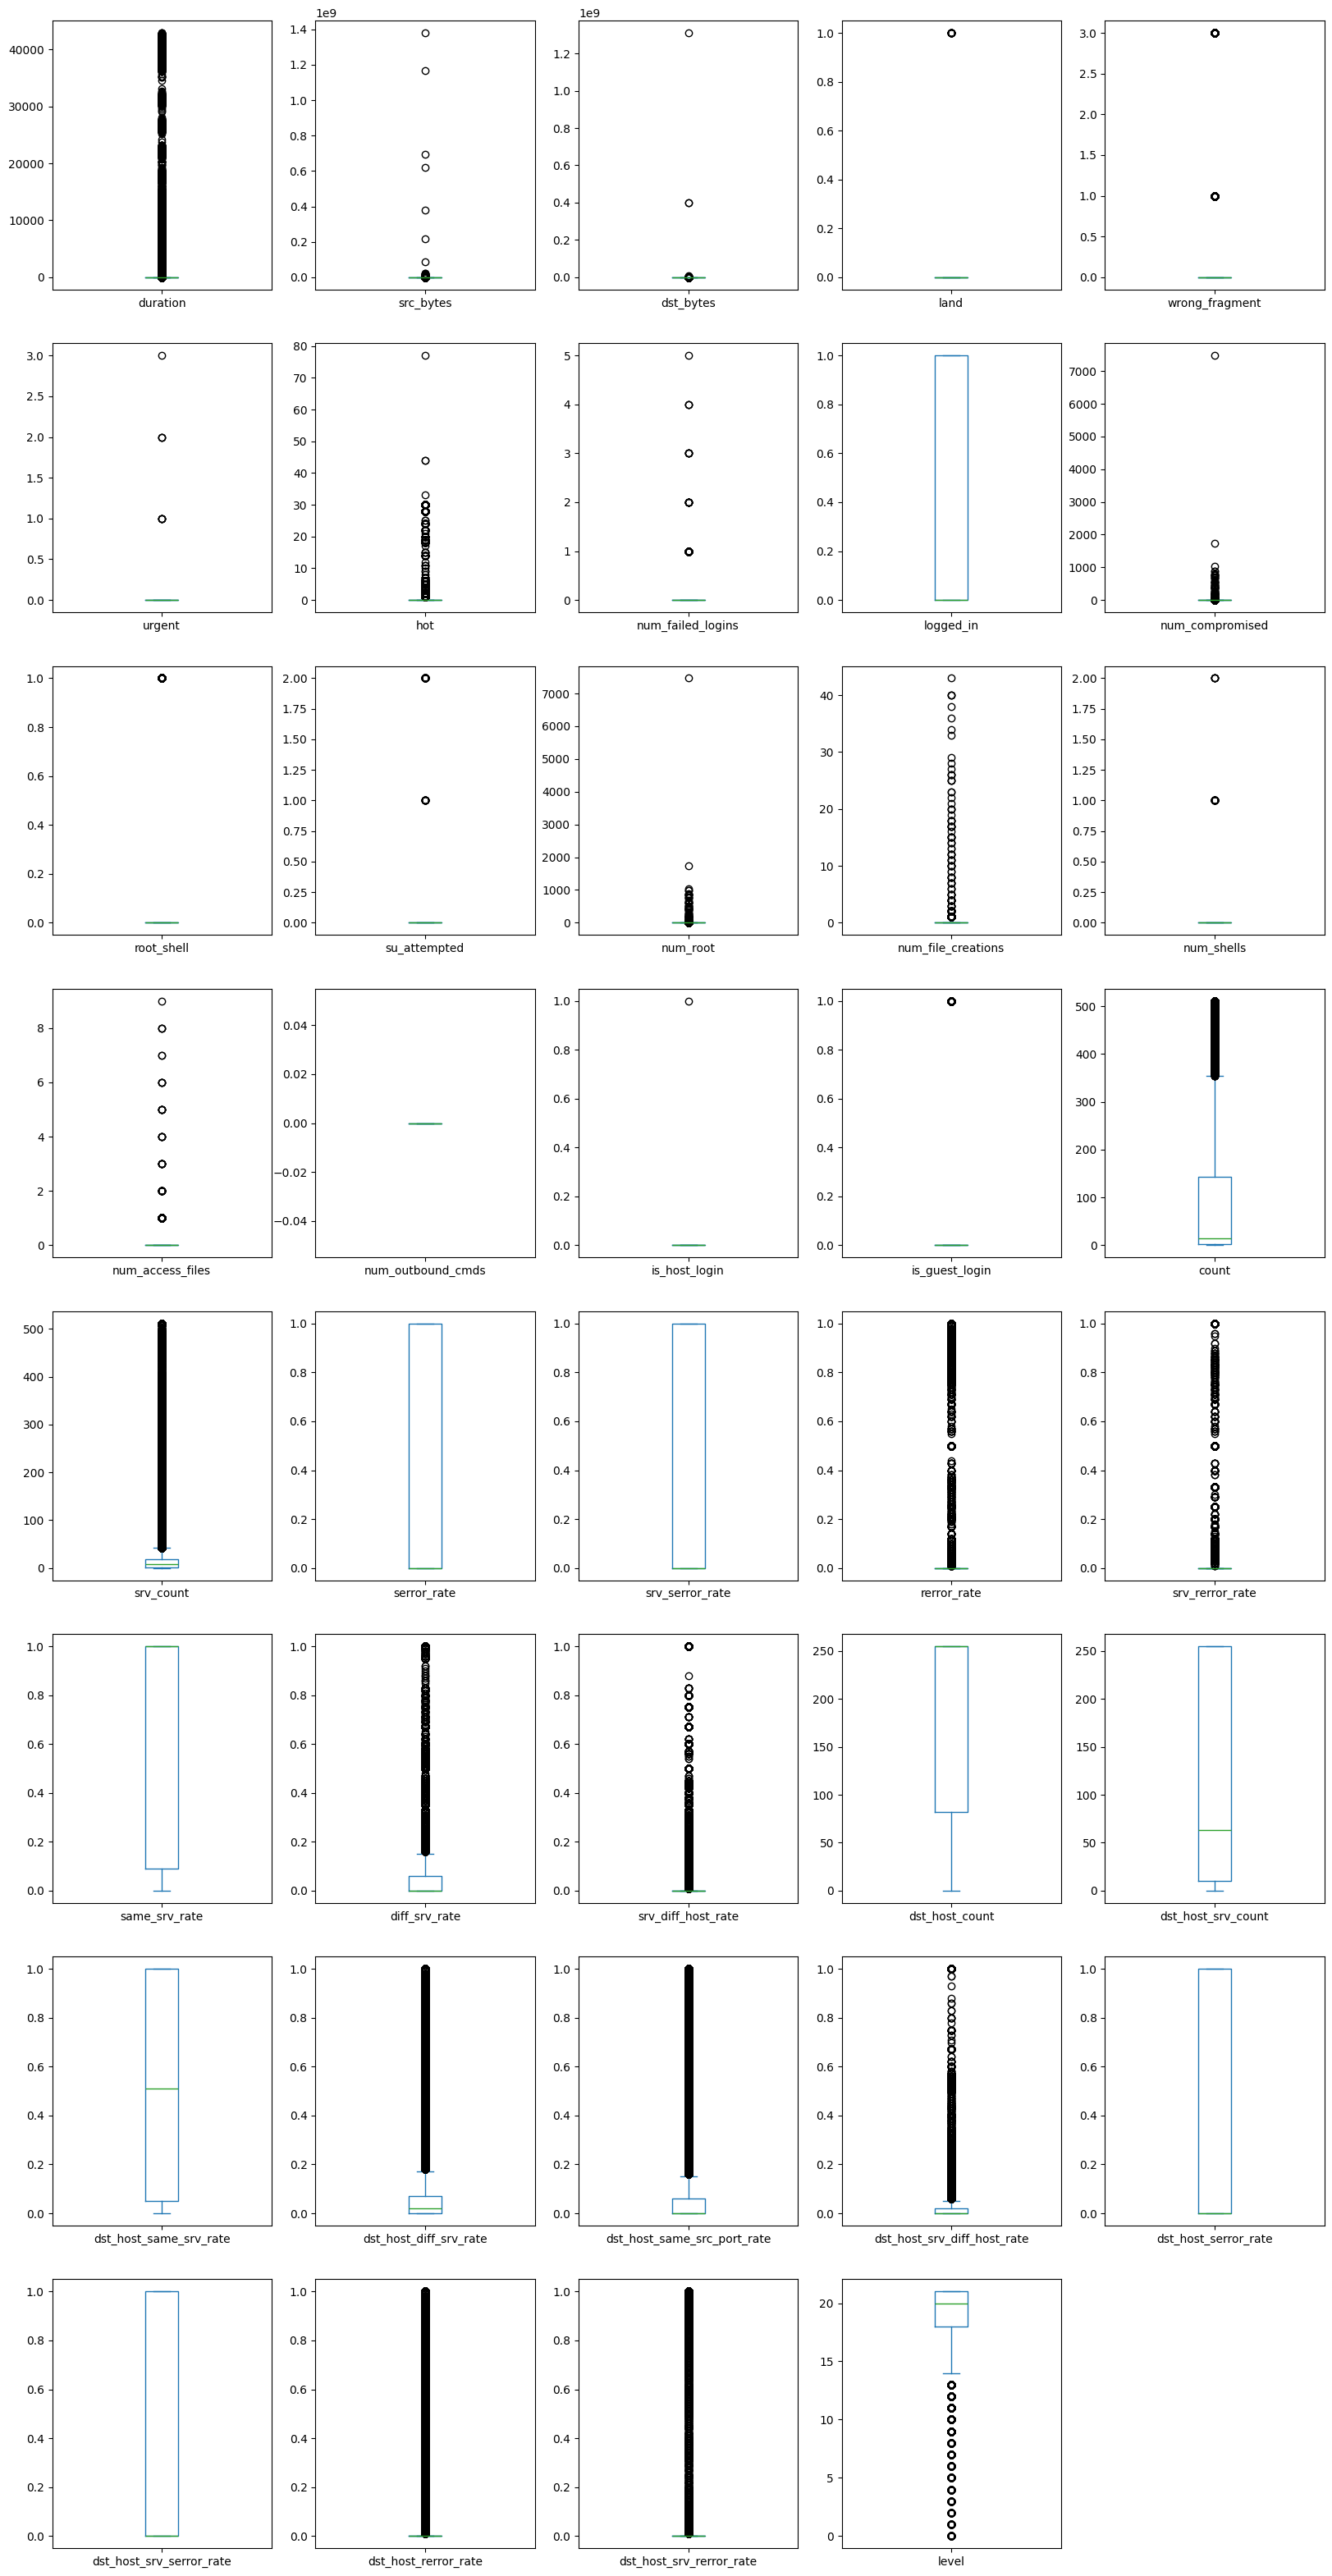

In [168]:
# Outliers
plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

There is no too much outlier to misslead the model so i will not drop the outliers

In [169]:
attack_n = []
for i in df.label :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
df['label'] = attack_n

In [170]:
df['label'].unique()

<StringArray>
['normal', 'attack']
Length: 2, dtype: str

## Data Pre-processing

In [171]:
# Binary classification
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal' else 1)


In [172]:
# Encode categorical features
categorical_cols = ['protocol_type', 'service', 'flag']
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [173]:
# Train-test split
X = df.drop(['label', 'level'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=43)

# Feature Engineering

In [174]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

src_bytes                     0.567
service                       0.468
dst_bytes                     0.439
flag                          0.370
same_srv_rate                 0.369
diff_srv_rate                 0.361
dst_host_srv_count            0.338
dst_host_same_srv_rate        0.312
logged_in                     0.292
dst_host_serror_rate          0.287
dst_host_diff_srv_rate        0.285
dst_host_srv_serror_rate      0.281
serror_rate                   0.278
srv_serror_rate               0.268
count                         0.266
dst_host_srv_diff_host_rate   0.188
dst_host_count                0.145
dst_host_same_src_port_rate   0.133
srv_diff_host_rate            0.099
dst_host_srv_rerror_rate      0.061
srv_count                     0.061
protocol_type                 0.055
rerror_rate                   0.039
dst_host_rerror_rate          0.037
srv_rerror_rate               0.036
duration                      0.028
wrong_fragment                0.008
hot                         

<Axes: >

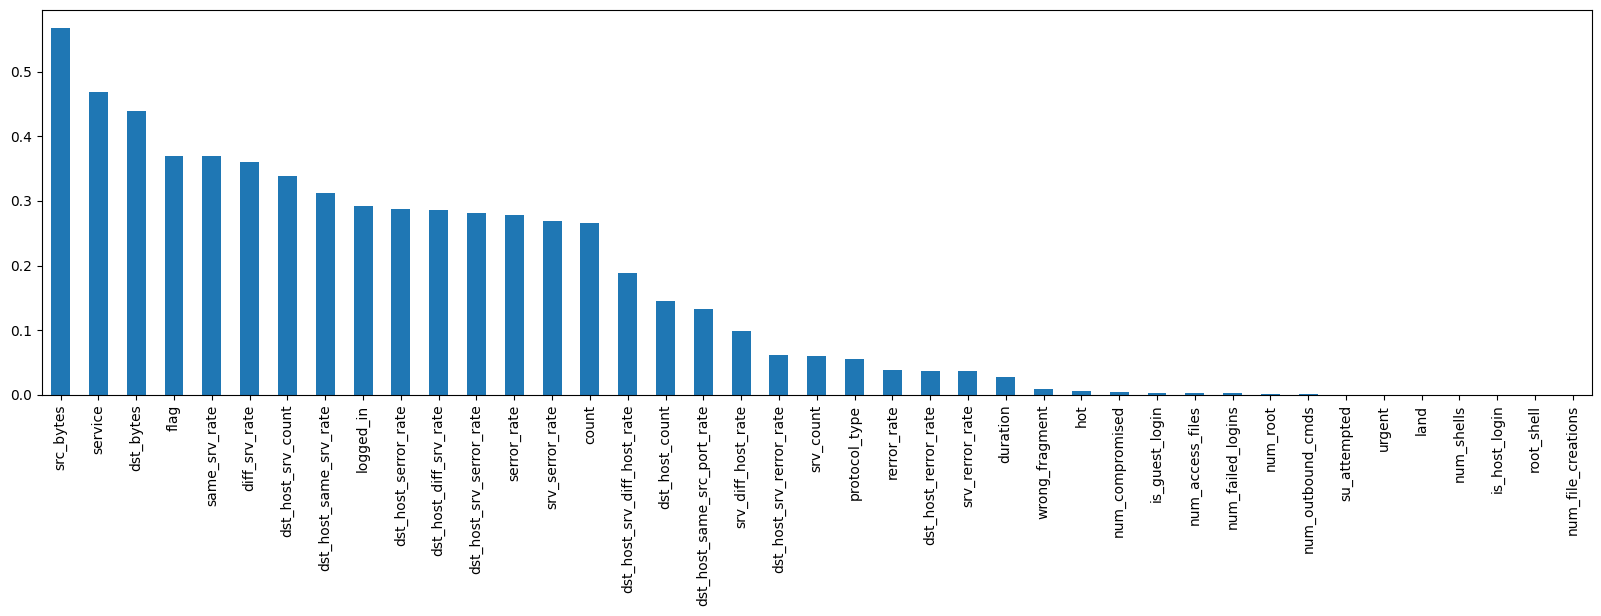

In [175]:
# Visualization
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5))

# feature selection

In [176]:
from sklearn.feature_selection import SelectKBest
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(X_train, y_train)
cols = X_train.columns[Select_features.get_support()]

In [177]:
cols = cols[:20]
print(cols)
#We will continue our model with these 20 features

X_train=X_train[cols]
X_test=X_test[cols]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'root_shell', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate'],
      dtype='str')


# Scaling

In [178]:
# Scaling
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("X info:")
print(type(X_train_scaled))
print(X_train_scaled.dtypes)
print(X_train_scaled.head())
print(f"Shape: {X_train_scaled.shape}")
print(f"Index: {X_train_scaled.index}")

X info:
<class 'pandas.DataFrame'>
duration              float64
protocol_type         float64
service               float64
flag                  float64
src_bytes             float64
dst_bytes             float64
wrong_fragment        float64
hot                   float64
logged_in             float64
num_compromised       float64
root_shell            float64
count                 float64
srv_count             float64
serror_rate           float64
srv_serror_rate       float64
rerror_rate           float64
srv_rerror_rate       float64
same_srv_rate         float64
diff_srv_rate         float64
srv_diff_host_rate    float64
dtype: object
   duration  protocol_type  service   flag  src_bytes  dst_bytes  \
0    -0.110         -0.125   -0.811 -0.736     -0.008     -0.005   
1    -0.110         -0.125   -0.444  0.751     -0.008     -0.005   
2    -0.110         -0.125   -0.444  0.751     -0.008     -0.005   
3    -0.110          2.223   -1.178  0.751     -0.008     -0.005   
4    -0.110

# Noise injection and cleaning

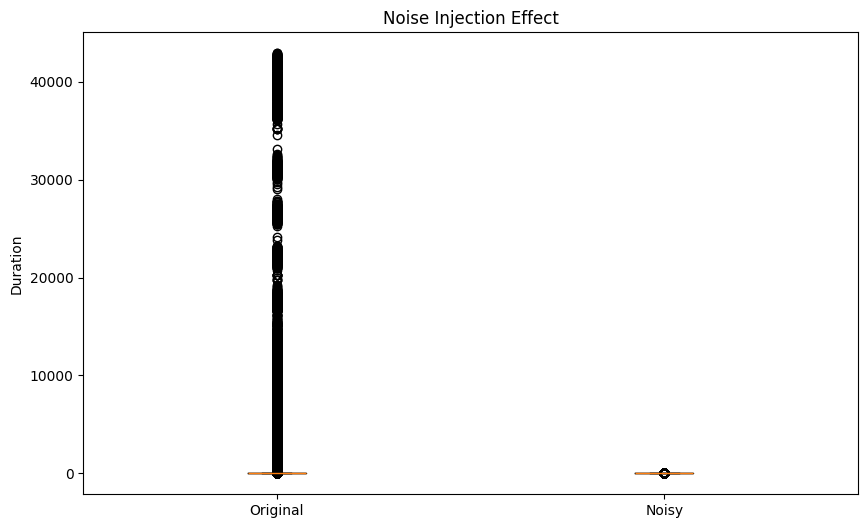

In [179]:
# Keep X as DataFrame
X_noisy = X_train_scaled.copy()
noise = np.random.normal(0, 0.1, X_noisy.shape[0])

# Use column name directly - works with pandas 3.0.0
first_col = X_noisy.columns[0]  # This is 'duration'
X_noisy[first_col] = (X_noisy[first_col] + noise).clip(lower=0)  #clip to prevent -ve time

# Noise cleaning using IQR
Q1 = np.percentile(X_noisy[first_col], 25)
Q3 = np.percentile(X_noisy[first_col], 75)
IQR = Q3 - Q1

mask = (X_noisy[first_col] >= Q1 - 1.5*IQR) & (X_noisy[first_col] <= Q3 + 1.5*IQR)
X_clean = X_noisy[mask]
y_clean = y_train.iloc[mask.values]   # keep as pandas Series

# Boxplot for pandas
plt.boxplot([X.iloc[:, 0], X_noisy.iloc[:, 0]], labels=['Original', 'Noisy'])
plt.title("Noise Injection Effect")
plt.ylabel("Duration")
plt.show()

# Statistical analysis

In [180]:
stats = X_train_scaled.describe().T[['mean','std']]
stats['skewness'] = X_train_scaled.skew(numeric_only=True)
print(stats.head())


                mean   std  skewness
duration       0.000 1.000    11.856
protocol_type  0.000 1.000     0.313
service       -0.000 1.000     0.451
flag           0.000 1.000    -0.949
src_bytes      0.000 1.000   181.375


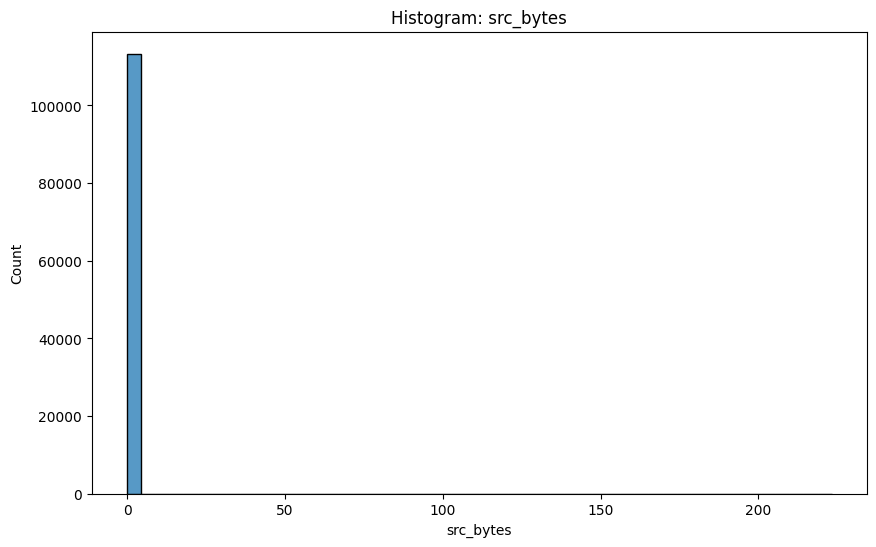

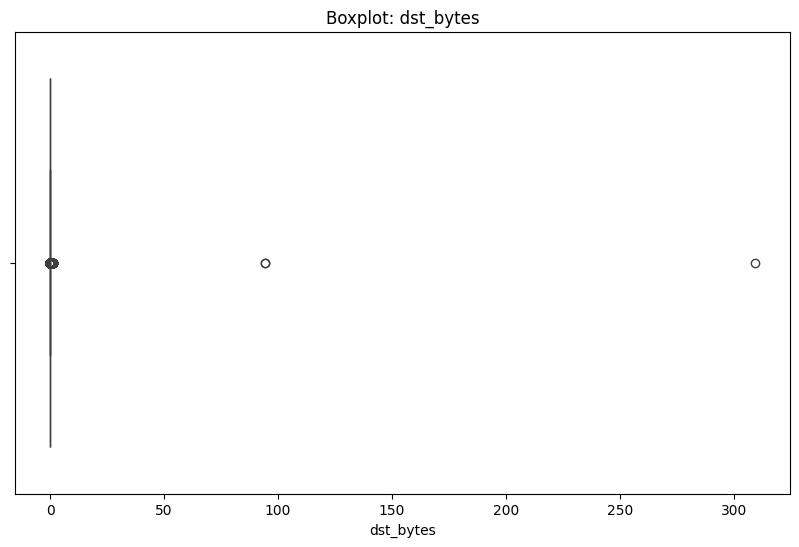

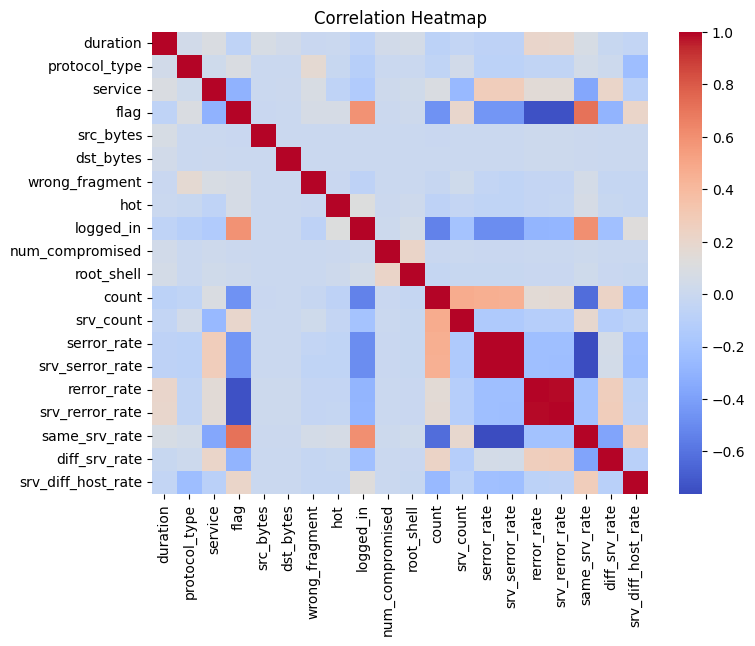

In [181]:
sns.histplot(X_train_scaled['src_bytes'], bins=50)
plt.title("Histogram: src_bytes")
plt.show()

sns.boxplot(x=X_train_scaled['dst_bytes'])
plt.title("Boxplot: dst_bytes")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(X_train_scaled.corr(numeric_only=True), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Unsupervised Learning - K-Means

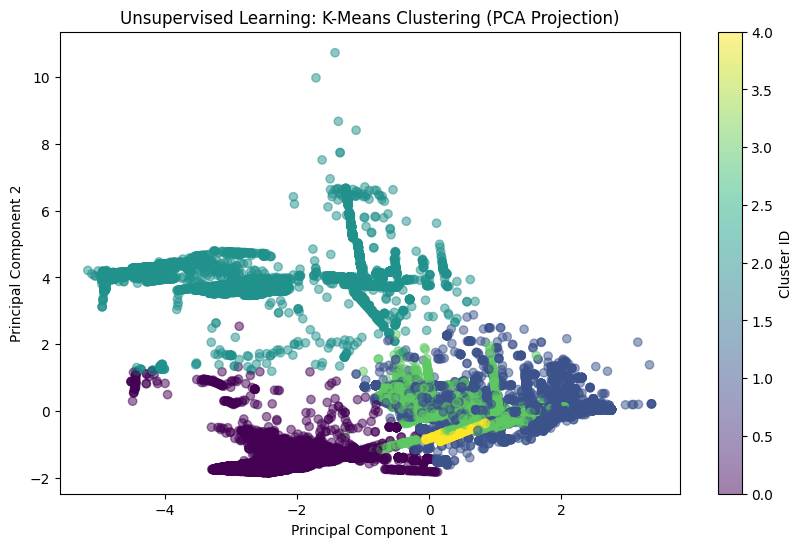


--- Cluster vs Actual Label Comparison ---
Cluster      0      1      2      3     4
Actual                                   
0          298  46486   2679  11061   111
1        31317   6208  11014   2295  1906


In [182]:
# Applying K-Means
kmeans = KMeans(n_clusters=5, random_state=43)

# Using X_train_scaled for clustering
clusters = kmeans.fit_predict(X_train_scaled)

# Visualization: PCA for 2D representation
# Having 20 features - using PCA to squash them into 2D to plot them.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 6))

# Plotting the clusters found by K-Means
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title("Unsupervised Learning: K-Means Clustering (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster ID')
plt.show()

# Interpretation
comparison_df = pd.DataFrame({'Actual': y_train, 'Cluster': clusters})
print("\n--- Cluster vs Actual Label Comparison ---")
print(pd.crosstab(comparison_df['Actual'], comparison_df['Cluster']))

# Analysis of K-means
Best output given by **clusters = 5** - composed of one **Normal* class and four **Attack* classes (DoS, Probe, R2L, U2R).

**Cluster 3** - contains only 1 normal connection and 0 attacks. This is a pure cluster that effectively isolates a very specific type of traffic.

**Cluster 1** - captures the vast majority of normal traffic 46,477, which is exactly what a good intrusion detection system should do.

**Cluster 0** - primary attack cluster, capturing 31,315 intrusions